In [1]:
import ta
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("../data/kaggle_bitcoin.csv")

<IPython.core.display.Javascript object>

In [4]:
df["Date"] = pd.to_datetime(df["Timestamp"], unit="s")

<IPython.core.display.Javascript object>

# Boilinger bands
https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands

In [5]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [6]:
indicator_bb = ta.volatility.BollingerBands(close=df["Close"], window=30, window_dev=2)

<IPython.core.display.Javascript object>

In [7]:
df['bb_bbm'] = indicator_bb.bollinger_mavg()  # SMA: Simple moving average!
df['bb_bbh'] = indicator_bb.bollinger_hband()  # Add standard deviation to SMA
df['bb_bbl'] = indicator_bb.bollinger_lband()  # Subtract standard deviation from SMA

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()


<IPython.core.display.Javascript object>

# Plots

In [8]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [9]:
df_sub = df.iloc[-1000:]

<IPython.core.display.Javascript object>

In [10]:
df_ind_s = df_sub[df_sub["bb_bbhi"] > 0]
df_ind_b = df_sub[df_sub["bb_bbli"] > 0]

<IPython.core.display.Javascript object>

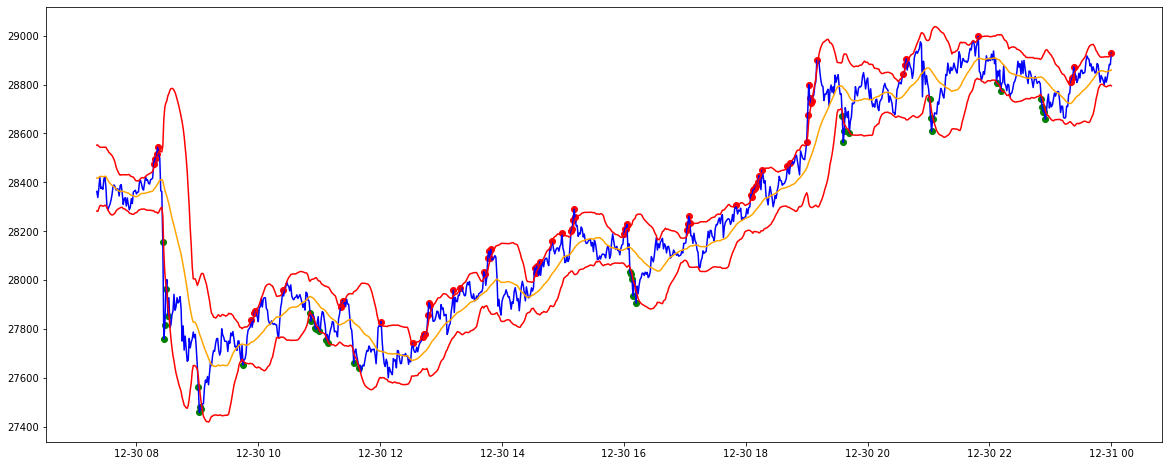

<IPython.core.display.Javascript object>

In [11]:
df_sub = df.iloc[-1000:]
plt.figure(figsize=(20, 8))
plt.plot(df_sub["Date"], df_sub["Close"], c="b")

# Plot average and bands
plt.plot(df_sub["Date"], df_sub["bb_bbm"], c="orange")
plt.plot(df_sub["Date"], df_sub["bb_bbh"], c="red")
plt.plot(df_sub["Date"], df_sub["bb_bbl"], c="red")

# Plot the indicators. Green when we should buy(falling below std), and red for selling(above std)
plt.scatter(df_ind_b["Date"], df_sub.loc[df_ind_b.index]["Close"], c="green")
plt.scatter(df_ind_s["Date"], df_sub.loc[df_ind_s.index]["Close"], c="red")

plt.show()

# Strategy

In [33]:
import sys

sys.path.insert(0, "../env")
sys.path.insert(0, "../policies")

<IPython.core.display.Javascript object>

In [34]:
from bollinger import BollingerBasicAgent

<IPython.core.display.Javascript object>

In [35]:
from bitcoin_simple_env import BitcoinTradingEnv

<IPython.core.display.Javascript object>

In [36]:
from tqdm import tqdm

<IPython.core.display.Javascript object>

In [56]:
from datetime import datetime

start_date = datetime(year=2019, month=2, day=1)

<IPython.core.display.Javascript object>

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 1999/3000 [00:02<00:01, 912.33it/s]


Steps left == 0 => Done
Gained:  100.04522201834692
Max possible gain:  100.63376522825519


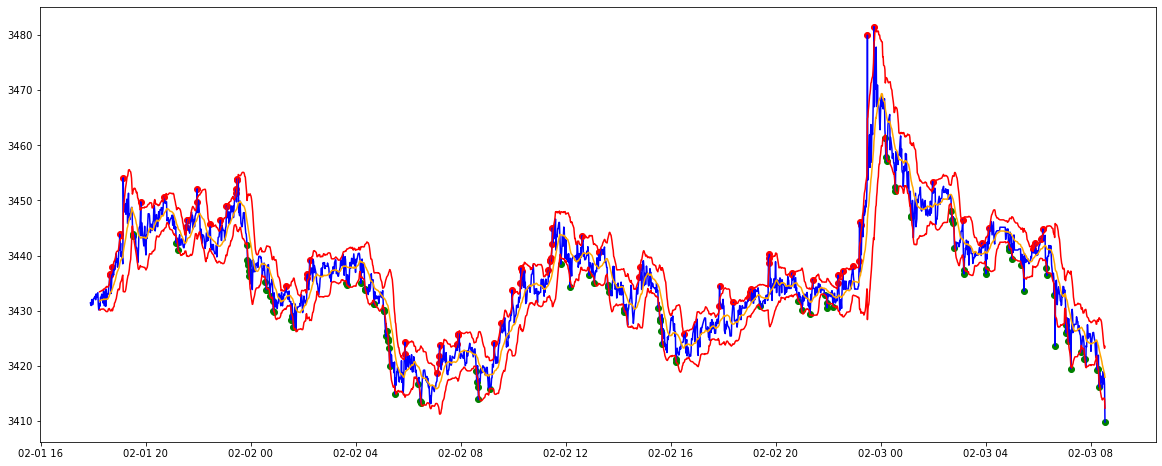

<IPython.core.display.Javascript object>

In [61]:
start_date = datetime(year=2019, month=2, day=1)
steps = 2000


env = BitcoinTradingEnv(df, start_date, steps=steps)
obs = env.reset()
policy = BollingerBasicAgent()
n_steps = len(env.df)

for i in tqdm(range(n_steps)):
    action = policy(obs)
    obs, reward, done, d = env.step(action)
    if done:
        break

df_res = obs.dropna()
max_gain = df_res['Close'].iloc[0] / df_res['Close'].iloc[-1] * 100
gain = (df_res['net_worth'].iloc[0]/df_res['net_worth'].iloc[-1]) * 100
print("Gained: ", gain)
print("Max possible gain: ", max_gain)

policy.render(df_res)
